In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,time,json
import tmdbsimple as tmdb 
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb

In [2]:
#Import data
year_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
year_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)

In [3]:
# Keep only the imdb_id, certification, revenue, budget
year_2000 = year_2000[['imdb_id','revenue','budget','certification']]
# Keep only the imdb_id, certification, revenue, budget
year_2001 = year_2001[['imdb_id','revenue','budget','certification']]

In [4]:
year_2000.dropna(inplace = True)
year_2001.dropna(inplace=True)

In [5]:
df = pd.concat([year_2000, year_2001], axis=0, join="inner")
display(df.head(), df.tail())

,imdb_id,revenue,budget,certification
4,tt0118694,12854953.0,150000.0,PG
5,tt0118852,0.0,0.0,R
6,tt0119273,0.0,15000000.0,R
7,tt0119495,0.0,0.0,R
11,tt0120467,14904.0,120000.0,R


,imdb_id,revenue,budget,certification
1487,tt3041064,0.0,0.0,NR
1493,tt4176340,0.0,0.0,NR
1501,tt5312066,0.0,0.0,NR
1506,tt8795764,0.0,0.0,NR
1510,tt6692588,0.0,0.0,R


In [6]:
#How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
budget = df['revenue'] > 0
revenue = df['budget'] > 0
financial = df.loc[budget & revenue, :]
len(financial)

306

In [7]:
#How many movies are there in each of the certification categories (G/PG/PG-13/R)?
financial['certification'].value_counts()

R        140
PG-13    117
PG        30
G         13
NR         6
Name: certification, dtype: int64

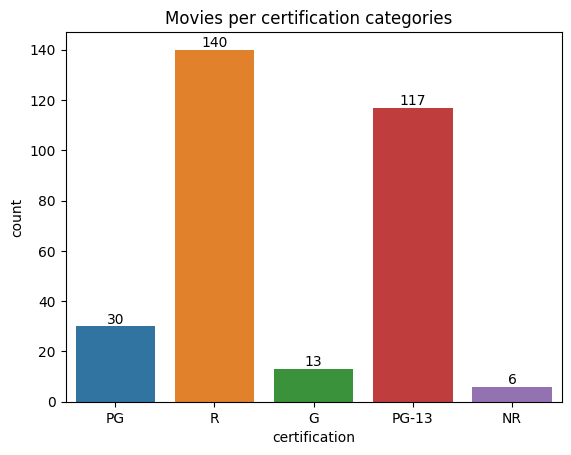

In [8]:
ax =sns.countplot(x='certification', data=df.loc[budget & revenue, :])
plt.title('Movies per certification categories  ')
ax.bar_label(ax.containers[0]);

In [9]:
#What is the average revenue per certification category?
pd.set_option('display.float_format', '${:,.0f}'.format)
financial.groupby('certification')['revenue'].mean()

certification
G       $133,216,882
NR       $23,823,316
PG      $130,293,367
PG-13   $111,073,959
R        $53,693,513
Name: revenue, dtype: float64

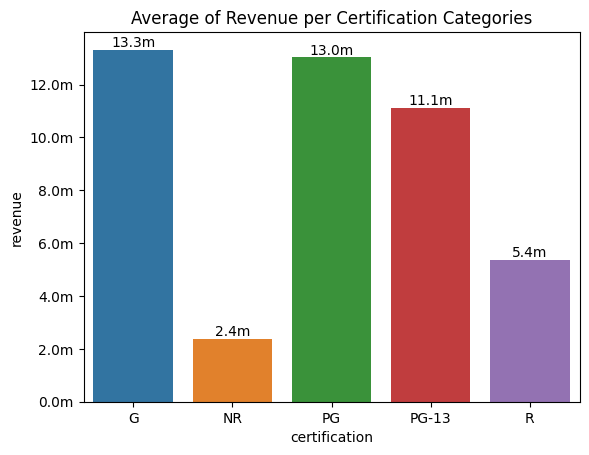

In [10]:
from matplotlib.ticker import FuncFormatter
#Convert the tick
def thousands(x, pos):
    return '%1.1fm' % (x * 1e-7)

formatter = FuncFormatter(thousands)
fig, ax = plt.subplots()
avg_rev = df.loc[budget & revenue, :].groupby('certification')['revenue'].mean()
plt.title('Average of Revenue per Certification Categories')
sns.barplot(x= avg_rev.index, y=avg_rev).yaxis.set_major_formatter(formatter)
for p,date in zip(ax.patches, avg_rev.apply(lambda x: '%1.1fm' % (x * 1e-7))):
    ax.annotate(date, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

In [11]:
#What is the average budget per certification category?
df.loc[budget & revenue].groupby('certification')['budget'].mean()

certification
G       $44,000,000
NR      $14,783,333
PG      $52,016,667
PG-13   $46,806,815
R       $27,142,958
Name: budget, dtype: float64

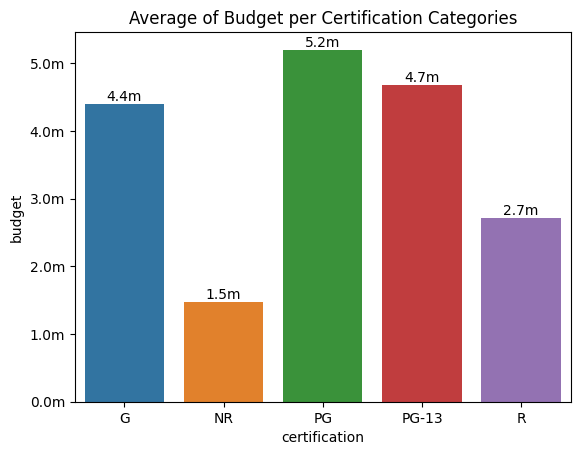

In [12]:
fig, ax = plt.subplots()
avg_rev = df.loc[budget & revenue, :].groupby('certification')['budget'].mean()
sns.barplot(x= avg_rev.index, y=avg_rev).yaxis.set_major_formatter(formatter)
plt.title('Average of Budget per Certification Categories')
for p,date in zip(ax.patches, avg_rev.apply(lambda x: '%1.1fm' % (x * 1e-7))):
    ax.annotate(date, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

In [13]:
df.to_csv("Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)